<a href="https://colab.research.google.com/github/maryofcarmo/TCC/blob/main/4%C2%B0_MELHORES_REGIOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1° Ligar ao google e chamar bibliotecas necessárias

In [1]:
# conecta o notebook ao google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 2° Ler o arquivo CSV já montado anteriomente, e faz a limpeza

In [3]:
# ler o Arquivo com as informações das estações e coloca na variável est_info
# est_info é um dataframe
est_info = pd.read_csv('/content/drive/MyDrive/TCC/DADOS/INFORMACOES_ESTACOES/est_com_correlacao.csv')

# Excluir as linhas que têm pelo menos um valor vazio
est_info_limp = est_info.dropna()
est_info_limp.head()

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,P2,P3,K1,K2,K3,S1,S2,S3
0,Nome:_AGUA_BRANCA_Codigo_Estacao:_82989,AGUA BRANCA,82989,-9.264722,-37.938056,603.42,Operante,2000-01-01,2024-06-01,Mensal,0.789641,-0.771172,-0.952617,0.606061,-0.515152,-0.848485,0.804196,-0.713287,-0.937063
2,Nome:_MACEIO_Codigo_Estacao:_82994,MACEIO,82994,-9.551389,-35.770833,84.12,Fechada,2000-01-01,2021-04-07,Mensal,0.668656,-0.659552,-0.492009,0.381691,-0.584615,-0.442761,0.570929,-0.805263,-0.647987
5,Nome:_PALMEIRA_DOS_INDIOS_Codigo_Estacao:_82992,PALMEIRA DOS INDIOS,82992,-9.420278,-36.620278,277.98,Operante,2000-01-01,2024-06-01,Mensal,0.733587,-0.481364,-0.696482,0.484848,-0.212121,-0.606061,0.671329,-0.342657,-0.741259
6,Nome:_PAO_DE_ACUCAR_Codigo_Estacao:_82990,PAO DE ACUCAR,82990,-9.749167,-37.430833,20.86,Operante,2000-01-01,2024-06-01,Mensal,0.630290,-0.705835,-0.940163,0.454545,-0.636364,-0.818182,0.629371,-0.783217,-0.937063
8,Nome:_PORTO_DE_PEDRAS_Codigo_Estacao:_82996,PORTO DE PEDRAS,82996,-9.162012,-35.299881,42.21,Operante,2000-01-01,2024-06-01,Mensal,0.477049,-0.713409,-0.833801,0.181818,-0.515152,-0.545455,0.328671,-0.748252,-0.671329


In [4]:
#numero de estações com dados
len(est_info_limp)

93

# 3° Criação de DF com os coeficientes pertinentes


In [48]:
# Criar o DataFrame "hidro-solar"
hidro_solar = est_info_limp.drop(columns=['P2', 'P3', 'S2', 'S3', 'K2', 'K3'])

# Criar o DataFrame "hidro-eolica"
hidro_eolica = est_info_limp.drop(columns=['P1', 'P3', 'S1', 'S3', 'K1', 'K3'])

# Criar o DataFrame "solar-eolica"
solar_eolica = est_info_limp.drop(columns=['P1', 'P2', 'S1', 'S2', 'K1', 'K2'])

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P3,K3,S3
0,Nome:_AGUA_BRANCA_Codigo_Estacao:_82989,AGUA BRANCA,82989,-9.264722,-37.938056,603.42,Operante,2000-01-01,2024-06-01,Mensal,-0.952617,-0.848485,-0.937063
2,Nome:_MACEIO_Codigo_Estacao:_82994,MACEIO,82994,-9.551389,-35.770833,84.12,Fechada,2000-01-01,2021-04-07,Mensal,-0.492009,-0.442761,-0.647987
5,Nome:_PALMEIRA_DOS_INDIOS_Codigo_Estacao:_82992,PALMEIRA DOS INDIOS,82992,-9.420278,-36.620278,277.98,Operante,2000-01-01,2024-06-01,Mensal,-0.696482,-0.606061,-0.741259
6,Nome:_PAO_DE_ACUCAR_Codigo_Estacao:_82990,PAO DE ACUCAR,82990,-9.749167,-37.430833,20.86,Operante,2000-01-01,2024-06-01,Mensal,-0.940163,-0.818182,-0.937063
8,Nome:_PORTO_DE_PEDRAS_Codigo_Estacao:_82996,PORTO DE PEDRAS,82996,-9.162012,-35.299881,42.21,Operante,2000-01-01,2024-06-01,Mensal,-0.833801,-0.545455,-0.671329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Nome:_NATAL_Codigo_Estacao:_82598,NATAL,82598,-5.837222,-35.207778,47.68,Operante,2000-01-01,2024-06-01,Mensal,0.797946,0.606061,0.804196
112,Nome:_SERIDO_(CAICO)_Codigo_Estacao:_82690,SERIDO (CAICO),82690,-6.467500,-37.085000,171.26,Operante,2000-01-01,2024-06-01,Mensal,-0.304248,-0.303030,-0.440559
113,Nome:_ARACAJU_Codigo_Estacao:_83096,ARACAJU,83096,-10.952500,-37.054444,3.68,Fechada,2000-01-01,2020-12-31,Mensal,0.948704,0.818182,0.944056
114,Nome:_ITABAIANINHA_Codigo_Estacao:_83195,ITABAIANINHA,83195,-11.272222,-37.795000,205.59,Temporariamente Fechada,2000-01-01,2024-06-01,Mensal,-0.885413,-0.666667,-0.825175


# HIDRO-SOLAR (P1, K1, S1)

## seleciona as 20 melhores cidades




In [85]:
# Definir as colunas de interesse
colunas_hidro_solar = ['P1', 'K1', 'S1']

# Criar um DataFrame vazio para armazenar as estações selecionadas
estacoes_selecionadas_hs = pd.DataFrame()

# Loop pelas colunas de coeficientes
for coluna in colunas_hidro_solar:
    # Obter as 20 estações mais próximas de -1 na coluna atual
    top_20_proximos = hidro_solar.iloc[(hidro_solar[coluna] - (-1)).abs().argsort()[:20]]

    # Concatenar as estações selecionadas ao DataFrame resultante
    estacoes_selecionadas_hs = pd.concat([estacoes_selecionadas_hs, top_20_proximos])

# Remover duplicatas baseando-se na coluna 'Estacao'
estacoes_selecionadas_hs = estacoes_selecionadas_hs.drop_duplicates(subset='nome do arquivo').reset_index(drop=True)

cidades1 = ['RECIFE (CURADO)', 'ARACAJU', 'NATAL', 'SAO LUIS', 'BACABAL', 'BARRA DO CORDA', 'CAROLINA']

# Filtrar as linhas em que "Nome" não está na lista
estacoes_selecionadas_hs = estacoes_selecionadas_hs[~estacoes_selecionadas_hs['Nome'].isin(cidades1)].reset_index(drop=True)

# Exibir o DataFrame resultante
estacoes_selecionadas_hs

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,K1,S1
0,Nome:_FORTALEZA_Codigo_Estacao:_82397,FORTALEZA,82397,-3.815278,-38.537778,29.89,Operante,2000-01-01,2024-06-01,Mensal,-0.962113,-0.878788,-0.965035
1,Nome:_FLORIANO_Codigo_Estacao:_82678,FLORIANO,82678,-6.761667,-43.003333,126.60,Operante,2000-01-01,2024-06-01,Mensal,-0.951673,-0.787879,-0.923077
2,Nome:_CARINHANHA_Codigo_Estacao:_83408,CARINHANHA,83408,-14.297500,-43.771389,455.25,Fechada,2000-01-01,2020-10-31,Mensal,-0.944030,-0.878788,-0.958042
3,Nome:_PARNAIBA_Codigo_Estacao:_82287,PARNAIBA,82287,-3.086680,-41.783139,52.11,Desativada,2000-01-01,2018-09-30,Mensal,-0.943692,-0.757576,-0.909091
4,Nome:_ALTO_PARNAIBA_Codigo_Estacao:_82970,ALTO PARNAIBA,82970,-9.108333,-45.948611,285.05,Fechada,2000-01-01,2021-07-24,Mensal,-0.932022,-0.636364,-0.797203
5,Nome:_CORRENTINA_Codigo_Estacao:_83286,CORRENTINA,83286,-13.332500,-44.617500,551.69,Operante,2000-01-01,2024-06-01,Mensal,-0.928108,-0.787879,-0.930070
6,Nome:_BARREIRAS_Codigo_Estacao:_83236,BARREIRAS,83236,-12.155833,-45.008333,447.51,Operante,2000-01-01,2024-06-01,Mensal,-0.919957,-0.818182,-0.923077
7,Nome:_QUIXERAMOBIM_Codigo_Estacao:_82586,QUIXERAMOBIM,82586,-5.173056,-39.287222,227.33,Operante,2000-01-01,2024-06-01,Mensal,-0.917283,-0.818182,-0.937063
8,Nome:_TERESINA_Codigo_Estacao:_82578,TERESINA,82578,-5.034722,-42.801389,75.73,Operante,2000-01-01,2024-06-01,Mensal,-0.916741,-0.787879,-0.916084
9,Nome:_IRECE_Codigo_Estacao:_83182,IRECE,83182,-11.311389,-41.858611,747.22,Fechada,2000-01-01,2021-07-30,Mensal,-0.912672,-0.666667,-0.832168


## plota o mata das cidades no matplotlib

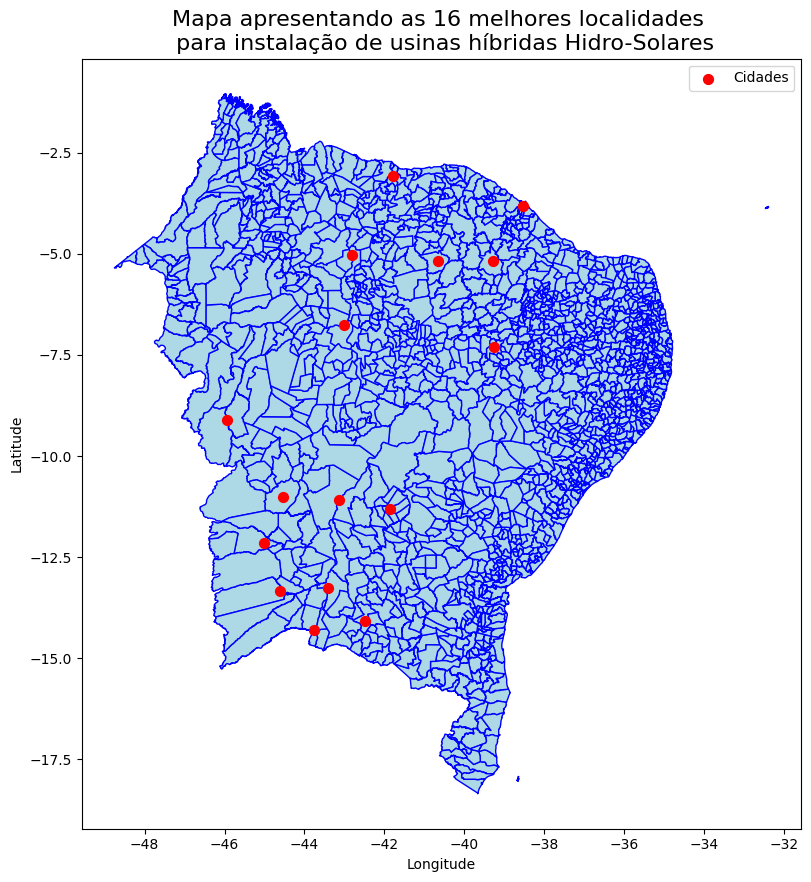

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

# Carregar o arquivo GeoJSON
localidade_geojson = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"
localidade = gpd.read_file(localidade_geojson)

# Converter as colunas de latitude e longitude em geometrias (pontos)
geometry = [Point(xy) for xy in zip(estacoes_selecionadas_hs['Longitude'], estacoes_selecionadas_hs['Latitude'])]
gdf_estacoes = gpd.GeoDataFrame(estacoes_selecionadas_hs, geometry=geometry)

# Configurar o sistema de coordenadas geográficas (crs)
gdf_estacoes.set_crs(epsg=4326, inplace=True)  # WGS84

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o GeoJSON (base do mapa)
localidade.plot(ax=ax, color='lightblue', edgecolor='blue')

# Plotar os pontos das estações meteorológicas
gdf_estacoes.plot(ax=ax, color='red', markersize=50, label='Cidades')

# Adicionar título e legenda
plt.title('Mapa apresentando as 16 melhores localidades \n para instalação de usinas híbridas Hidro-Solares', fontsize=16)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o mapa
plt.show()

## plota o mapa interativo

In [87]:
# Carregar o GeoJSON da região
geojson_path = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"

# Criar um mapa centrado na média das latitudes e longitudes
centro_lat = estacoes_selecionadas_hs['Latitude'].mean()
centro_lon = estacoes_selecionadas_hs['Longitude'].mean()
m = folium.Map(location=[centro_lat, centro_lon], zoom_start=10)

# Adicionar marcadores das estações ao mapa
for _, row in estacoes_selecionadas_hs.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Estação: {row['Nome']}",#<br>S3: {row['S3']}",
        tooltip=row['Nome']
    ).add_to(m)

# Exibir o mapa
m.save("mapa_interativo.html")
print("O mapa foi salvo como 'mapa_interativo.html'.")
m

O mapa foi salvo como 'mapa_interativo.html'.


# HIDRO-EOLICA (P2, K2, S2)

## seleciona as 20 melhores cidades

In [88]:
# Definir as colunas de interesse
colunas_hidro_eolica = ['P2', 'K2', 'S2']

# Criar um DataFrame vazio para armazenar as estações selecionadas
estacoes_selecionadas_he = pd.DataFrame()

# Loop pelas colunas de coeficientes
for coluna in colunas_hidro_eolica:
    # Obter as 20 estações mais próximas de -1 na coluna atual
    top_20_proximos = hidro_eolica.iloc[(hidro_eolica[coluna] - (-1)).abs().argsort()[:20]]

    # Concatenar as estações selecionadas ao DataFrame resultante
    estacoes_selecionadas_he = pd.concat([estacoes_selecionadas_he, top_20_proximos])

# Remover duplicatas baseando-se na coluna 'Estacao'
estacoes_selecionadas_he = estacoes_selecionadas_he.drop_duplicates(subset='nome do arquivo').reset_index(drop=True)

cidades2 = ['PETROLINA','BOM JESUS DA LAPA', 'CAROLINA', 'BARRA DO CORDA', 'BACABAL', 'SAO LUIS', 'TERESINA', 'FLORIANO', 'CRATEUS', 'FORTALEZA', 'BARBALHA']

# Filtrar as linhas em que "Nome" não está na lista
estacoes_selecionadas_he = estacoes_selecionadas_he[~estacoes_selecionadas_he['Nome'].isin(cidades2)].reset_index(drop=True)

# Exibir o DataFrame resultante
estacoes_selecionadas_he

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P2,K2,S2
0,Nome:_RECIFE_(CURADO)_Codigo_Estacao:_82900,RECIFE (CURADO),82900,-8.059167,-34.959167,11.30,Fechada,2000-01-01,2020-08-31,Mensal,-0.931470,-0.848485,-0.937063
1,Nome:_ARACAJU_Codigo_Estacao:_83096,ARACAJU,83096,-10.952500,-37.054444,3.68,Fechada,2000-01-01,2020-12-31,Mensal,-0.910234,-0.878788,-0.972028
2,Nome:_SENHOR_DO_BONFIM_Codigo_Estacao:_83088,SENHOR DO BONFIM,83088,-10.443072,-40.148244,532.09,Desativada,2000-01-01,2011-07-31,Mensal,-0.879052,-0.696970,-0.853147
3,Nome:_PAULO_AFONSO_Codigo_Estacao:_82986,PAULO AFONSO,82986,-9.378106,-38.226771,255.04,Desativada,2000-01-01,2015-04-30,Mensal,-0.847032,-0.636364,-0.790210
4,Nome:_CRUZ_DAS_ALMAS_Codigo_Estacao:_83222,CRUZ DAS ALMAS,83222,-12.675278,-39.089722,219.69,Operante,2000-01-01,2024-06-01,Mensal,-0.840677,-0.696970,-0.853147
5,Nome:_CAMACARI_Codigo_Estacao:_83226,CAMACARI,83226,-12.691233,-38.337536,41.17,Desativada,2000-01-01,2006-07-24,Mensal,-0.834846,-0.545455,-0.727273
6,Nome:_MONTE_SANTO_Codigo_Estacao:_83090,MONTE SANTO,83090,-10.442500,-39.330833,465.84,Fechada,2000-01-01,2020-04-30,Mensal,-0.831693,-0.606061,-0.769231
7,Nome:_GARANHUNS_Codigo_Estacao:_82893,GARANHUNS,82893,-8.910833,-36.493333,827.78,Fechada,2000-01-01,2022-11-11,Mensal,-0.811053,-0.625972,-0.819616
8,Nome:_AREIA_Codigo_Estacao:_82696,AREIA,82696,-6.975556,-35.718056,571.75,Operante,2000-01-01,2024-06-01,Mensal,-0.809762,-0.575758,-0.755245
9,Nome:_SERRINHA_Codigo_Estacao:_83190,SERRINHA,83190,-11.668056,-39.001944,362.39,Fechada,2000-01-01,2024-06-01,Mensal,-0.806141,-0.606061,-0.783217


## plota o mata das cidades no matplotlib

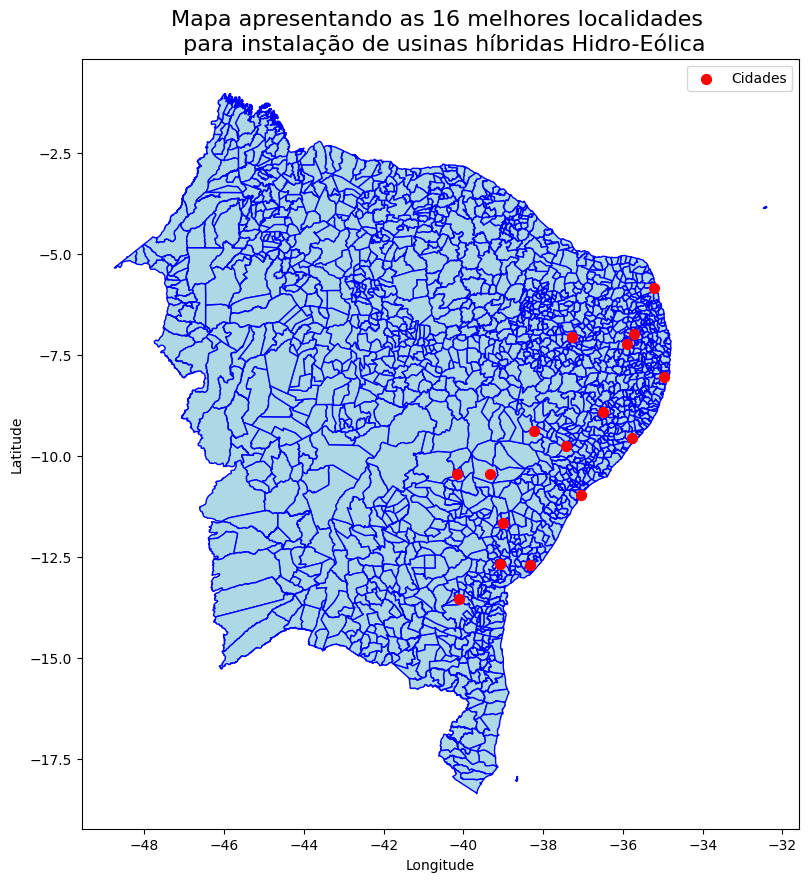

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

# Carregar o arquivo GeoJSON
localidade_geojson = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"
localidade = gpd.read_file(localidade_geojson)

# Converter as colunas de latitude e longitude em geometrias (pontos)
geometry = [Point(xy) for xy in zip(estacoes_selecionadas_he['Longitude'], estacoes_selecionadas_he['Latitude'])]
gdf_estacoes = gpd.GeoDataFrame(estacoes_selecionadas_he, geometry=geometry)

# Configurar o sistema de coordenadas geográficas (crs)
gdf_estacoes.set_crs(epsg=4326, inplace=True)  # WGS84

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o GeoJSON (base do mapa)
localidade.plot(ax=ax, color='lightblue', edgecolor='blue')

# Plotar os pontos das estações meteorológicas
gdf_estacoes.plot(ax=ax, color='red', markersize=50, label='Cidades')

# Adicionar título e legenda
plt.title('Mapa apresentando as 16 melhores localidades \n para instalação de usinas híbridas Hidro-Eólica', fontsize=16)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o mapa
plt.show()

## plota o mapa interativo

In [90]:
# Carregar o GeoJSON da região
geojson_path = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"

# Criar um mapa centrado na média das latitudes e longitudes
centro_lat = estacoes_selecionadas_he['Latitude'].mean()
centro_lon = estacoes_selecionadas_he['Longitude'].mean()
m = folium.Map(location=[centro_lat, centro_lon], zoom_start=10)

# Adicionar marcadores das estações ao mapa
for _, row in estacoes_selecionadas_he.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Estação: {row['Nome']}",#<br>S3: {row['S3']}",
        tooltip=row['Nome']
    ).add_to(m)

# Exibir o mapa
m.save("mapa_interativo.html")
print("O mapa foi salvo como 'mapa_interativo.html'.")
m

O mapa foi salvo como 'mapa_interativo.html'.


# SOLAR-EOLICA (P3, K3, S3)

## seleciona as 20 melhores cidades

In [77]:
# Definir as colunas de interesse
colunas_solar_eolica = ['P3', 'K3', 'S3']

# Criar um DataFrame vazio para armazenar as estações selecionadas
estacoes_selecionadas_se = pd.DataFrame()

# Loop pelas colunas de coeficientes
for coluna in colunas_solar_eolica:
    # Obter as 20 estações mais próximas de -1 na coluna atual
    top_20_proximos = solar_eolica.iloc[(solar_eolica[coluna] - (-1)).abs().argsort()[:20]]

    # Concatenar as estações selecionadas ao DataFrame resultante
    estacoes_selecionadas_se = pd.concat([estacoes_selecionadas_se, top_20_proximos])

# Remover duplicatas baseando-se na coluna 'Estacao'
estacoes_selecionadas_se = estacoes_selecionadas_se.drop_duplicates(subset='nome do arquivo').reset_index(drop=True)

cidades3 = ['IMPERATRIZ', 'CHAPADINHA', 'ALTO PARNAIBA', 'PICOS', 'CAETITE', 'GUARAMIRANGA', 'OURICURI']

# Filtrar as linhas em que "Nome" não está na lista
estacoes_selecionadas_se = estacoes_selecionadas_se[~estacoes_selecionadas_se['Nome'].isin(cidades3)].reset_index(drop=True)

# Exibir o DataFrame resultante
estacoes_selecionadas_se

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P3,K3,S3
0,Nome:_JOAO_PESSOA_Codigo_Estacao:_82798,JOAO PESSOA,82798,-7.095278,-34.848611,9.67,Operante,2000-01-01,2024-06-01,Mensal,-0.968646,-0.878788,-0.965035
1,Nome:_AGUA_BRANCA_Codigo_Estacao:_82989,AGUA BRANCA,82989,-9.264722,-37.938056,603.42,Operante,2000-01-01,2024-06-01,Mensal,-0.952617,-0.848485,-0.937063
2,Nome:_GARANHUNS_Codigo_Estacao:_82893,GARANHUNS,82893,-8.910833,-36.493333,827.78,Fechada,2000-01-01,2022-11-11,Mensal,-0.947050,-0.818182,-0.909091
3,Nome:_PAO_DE_ACUCAR_Codigo_Estacao:_82990,PAO DE ACUCAR,82990,-9.749167,-37.430833,20.86,Operante,2000-01-01,2024-06-01,Mensal,-0.940163,-0.818182,-0.937063
4,Nome:_SERRINHA_Codigo_Estacao:_83190,SERRINHA,83190,-11.668056,-39.001944,362.39,Fechada,2000-01-01,2024-06-01,Mensal,-0.899631,-0.696970,-0.867133
5,Nome:_ITABAIANINHA_Codigo_Estacao:_83195,ITABAIANINHA,83195,-11.272222,-37.795000,205.59,Temporariamente Fechada,2000-01-01,2024-06-01,Mensal,-0.885413,-0.666667,-0.825175
6,Nome:_CAMACARI_Codigo_Estacao:_83226,CAMACARI,83226,-12.691233,-38.337536,41.17,Desativada,2000-01-01,2006-07-24,Mensal,-0.879398,-0.757576,-0.916084
7,Nome:_FEIRA_DE_SANTANA_Codigo_Estacao:_83221,FEIRA DE SANTANA,83221,-12.196111,-38.967222,229.52,Fechada,2000-01-01,2018-12-17,Mensal,-0.874387,-0.606061,-0.713287
8,Nome:_PAULO_AFONSO_Codigo_Estacao:_82986,PAULO AFONSO,82986,-9.378106,-38.226771,255.04,Desativada,2000-01-01,2015-04-30,Mensal,-0.855743,-0.606061,-0.804196
9,Nome:_SENHOR_DO_BONFIM_Codigo_Estacao:_83088,SENHOR DO BONFIM,83088,-10.443072,-40.148244,532.09,Desativada,2000-01-01,2011-07-31,Mensal,-0.852624,-0.727273,-0.860140


## plota o mata das cidades no matplotlib

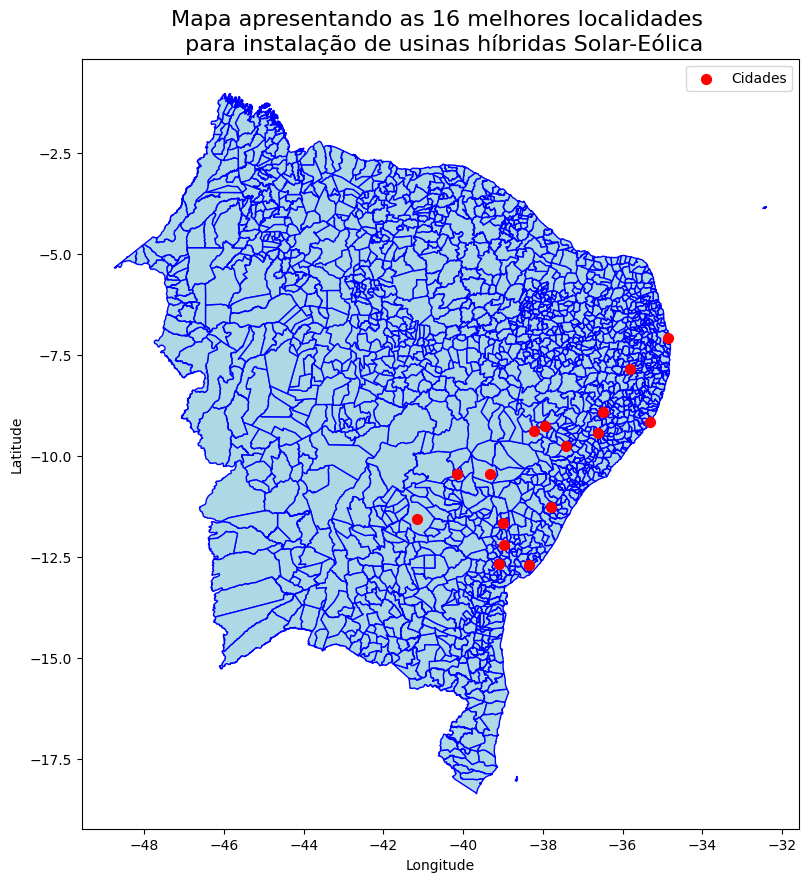

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

# Carregar o arquivo GeoJSON
localidade_geojson = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"
localidade = gpd.read_file(localidade_geojson)

# Converter as colunas de latitude e longitude em geometrias (pontos)
geometry = [Point(xy) for xy in zip(estacoes_selecionadas_se['Longitude'], estacoes_selecionadas_se['Latitude'])]
gdf_estacoes = gpd.GeoDataFrame(estacoes_selecionadas_se, geometry=geometry)

# Configurar o sistema de coordenadas geográficas (crs)
gdf_estacoes.set_crs(epsg=4326, inplace=True)  # WGS84

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o GeoJSON (base do mapa)
localidade.plot(ax=ax, color='lightblue', edgecolor='blue')

# Plotar os pontos das estações meteorológicas
gdf_estacoes.plot(ax=ax, color='red', markersize=50, label='Cidades')

# Adicionar título e legenda
plt.title('Mapa apresentando as 16 melhores localidades \n para instalação de usinas híbridas Solar-Eólica', fontsize=16)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o mapa
plt.show()

## plota o mapa interativo

In [79]:
# Carregar o GeoJSON da região
geojson_path = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"

# Criar um mapa centrado na média das latitudes e longitudes
centro_lat = estacoes_selecionadas_se['Latitude'].mean()
centro_lon = estacoes_selecionadas_se['Longitude'].mean()
m = folium.Map(location=[centro_lat, centro_lon], zoom_start=10)

# Adicionar marcadores das estações ao mapa
for _, row in estacoes_selecionadas_se.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Estação: {row['Nome']}",#<br>S3: {row['S3']}",
        tooltip=row['Nome']
    ).add_to(m)

# Exibir o mapa
m.save("mapa_interativo.html")
print("O mapa foi salvo como 'mapa_interativo.html'.")
m

O mapa foi salvo como 'mapa_interativo.html'.
